In [46]:
from skimage import io
from skimage.filters import gaussian
from skimage.restoration import denoise_nl_means
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from scipy.ndimage import mean
from scipy.signal import find_peaks
import numpy as np
from numpy.fft import rfft, irfft
%matplotlib widget 

In [47]:
# ВВЕДИТЕ НАЗВАНИЕ ФАЙЛА
inputImg = "4.png"
img = io.imread("images/" + inputImg, as_gray=True)

# Накладывание фильтров
denoisedImg = denoise_nl_means(img, fast_mode=True, h=0.2)
denoisedGaussian = gaussian(denoisedImg, 3)

In [48]:
# Сжатие картинки по горизонтальной оси в 4 раза(1px < дифракционного мин)
results = []

for i in range(0, denoisedGaussian.shape[1], 4):
    mean = denoisedGaussian[:, i:i+4].mean(axis=1)
    results.append(mean)
    
new = np.column_stack(results)

(-10.0, 100.0)

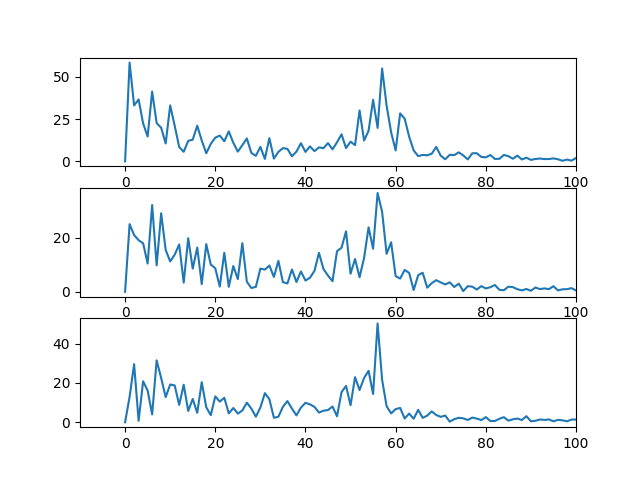

In [49]:
# Применяем преобразование Фурье
first = new[:, 0]
second = new[:, 100]
third = new[:, 200]

# Вычитаем из начального масиива среднее чтобы убрать пик на нуле
# и берем модуль чтобы избавиться от комплексных значений
a = abs(rfft(first - np.mean(first)))
b = abs(rfft(second - np.mean(second)))
c = abs(rfft(third - np.mean(third)))

fig1=plt.figure()

ax1=fig1.add_subplot(311)
ax1.plot(a)
plt.xlim(-10,100)

ax1=fig1.add_subplot(312)
ax1.plot(b)
plt.xlim(-10,100)

ax1=fig1.add_subplot(313)
ax1.plot(c)

plt.tight_layout
plt.xlim(-10,100)

(-10.0, 100.0)

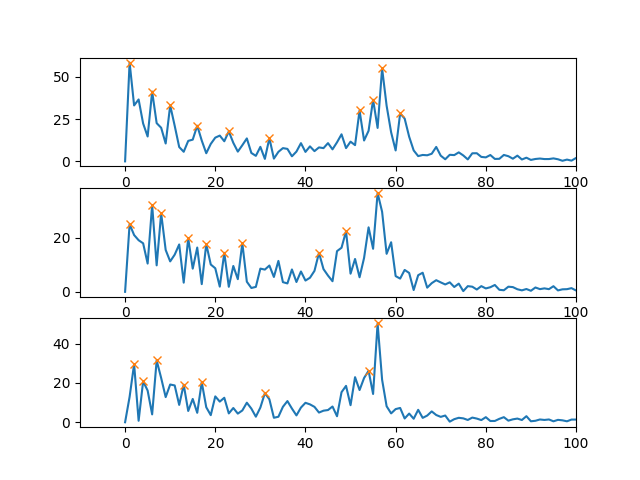

In [50]:
# Найдем главные пики частот
peaks, _ = find_peaks(a, prominence=10)
peaks1, _ = find_peaks(b, prominence=10)
peaks2, _ = find_peaks(c, prominence=10)

fig = plt.figure()
ax=fig.add_subplot(311)
ax.plot(a)
ax.plot(peaks, a[peaks], "x")
plt.xlim(-10,100)
ax=fig.add_subplot(312)
ax.plot(b)
ax.plot(peaks1, b[peaks1], "x")
plt.xlim(-10,100)
ax=fig.add_subplot(313)
ax.plot(c)
ax.plot(peaks2, c[peaks2], "x")
plt.xlim(-10,100)

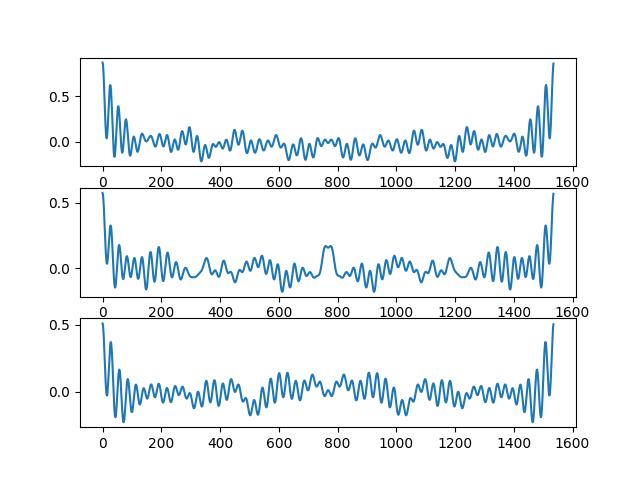

In [51]:
filter = a > min(a[peaks])
a_clean = a * filter
a_new = irfft(a_clean)

filter1 = b > min(b[peaks1])
b_clean = b * filter1
b_new = irfft(b_clean)

filter2 = c > min(c[peaks2])
c_clean = c * filter2
c_new = irfft(c_clean)

fig1=plt.figure()
ax1=fig1.add_subplot(311)
ax1.plot(a_new)
ax1=fig1.add_subplot(312)
ax1.plot(b_new)
ax1=fig1.add_subplot(313)
ax1.plot(c_new)

In [52]:
empty_array = []

for i in range(0 , new.shape[1]):
    a = new[:, i]
    b = abs(rfft(a - np.mean(a)))
    
    peaks, _ = find_peaks(b, prominence=10)
    
    filter = b > min(b[peaks])
    b_clean = b * filter
    b_new = irfft(b_clean)
    
    empty_array.append(b_new)

bruh = np.column_stack(empty_array)

In [53]:
bruh.shape

(1536, 512)

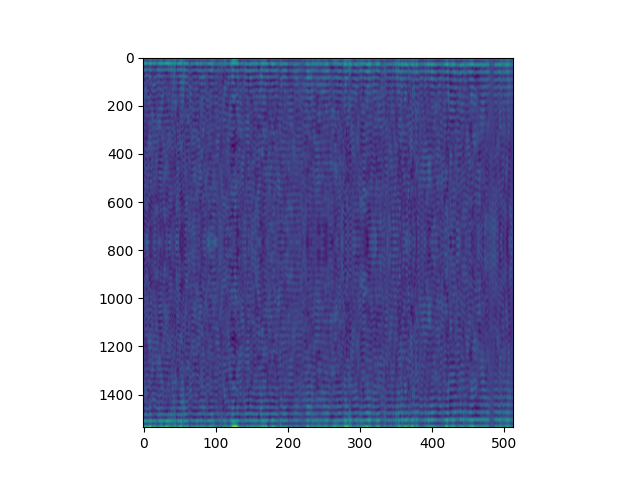

In [54]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
ax.imshow(bruh)

# Функция для того, чтобы оси графика были равны по длине
def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())
make_square_axes(plt.gca())

In [57]:
# ИЗМЕНИТЬ ЭТУ ПЕРЕМЕННУЮ ЧТОБЫ ПОЛУЧИТЬ ГРАФИК
target_plot = bruh
# turn NP array into xyz plot
m,n = target_plot.shape
y,x = np.mgrid[:m,:n]
z = target_plot

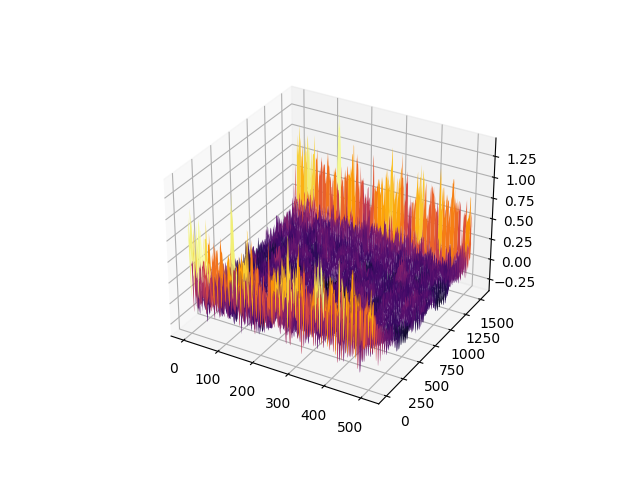

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y ,z, cmap ='inferno')